## EXPOLATORY DATA ANALYSIS

###Load the Titanic Dataset and Inspect its Structure

In [ ]:
# Install the Kaggle API client
!pip install -q kaggle

# Upload the kaggle.json file
from google.colab import files
files.upload()

# Create the .kaggle directory and move kaggle.json there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

# Download the Titanic dataset from Kaggle
!kaggle competitions download -c titanic

# Unzip the downloaded file
!unzip titanic.zip




Saving kaggle.json to kaggle.json
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 2.78MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# Load the dataset into a pandas DataFrame
import pandas as pd
titanic = pd.read_csv('train.csv')

# Display the first few rows of the dataset
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


###Clean the Data

In [ ]:
# Fill missing values in 'Age' with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
titanic.drop('Cabin', axis=1, inplace=True)

# Verify there are no more missing values
print(titanic.isnull().sum())



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


###Analyze Characteristics and Distributions of Individual Features

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Summary statistics
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#### Distribution of Age

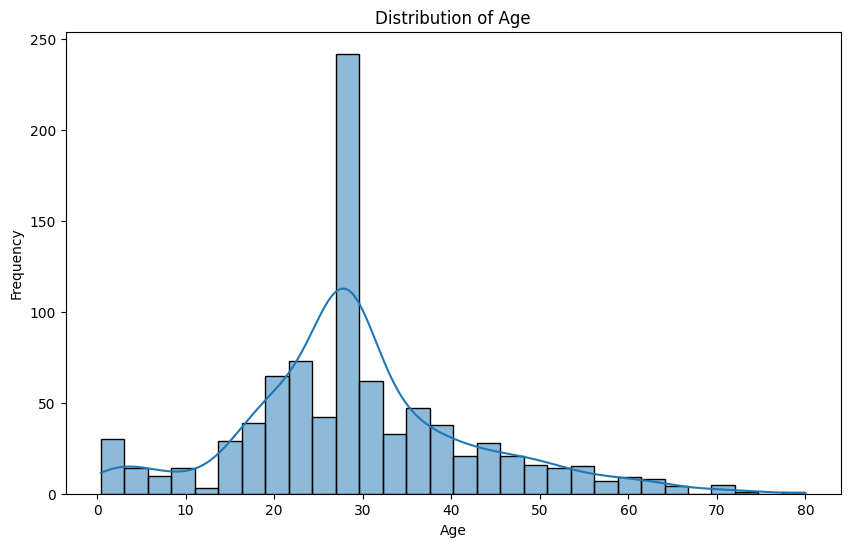

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


#### Distribution of Fare

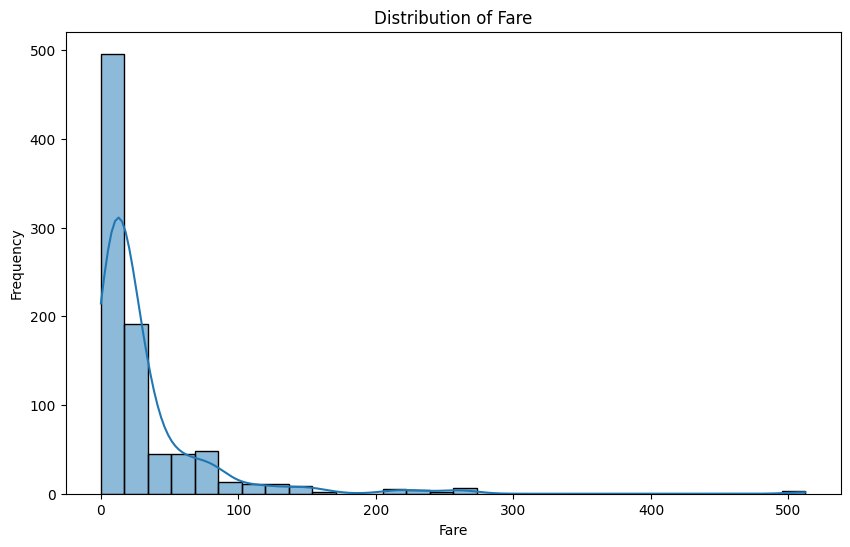

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(titanic['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

#### Count Plot of Survived

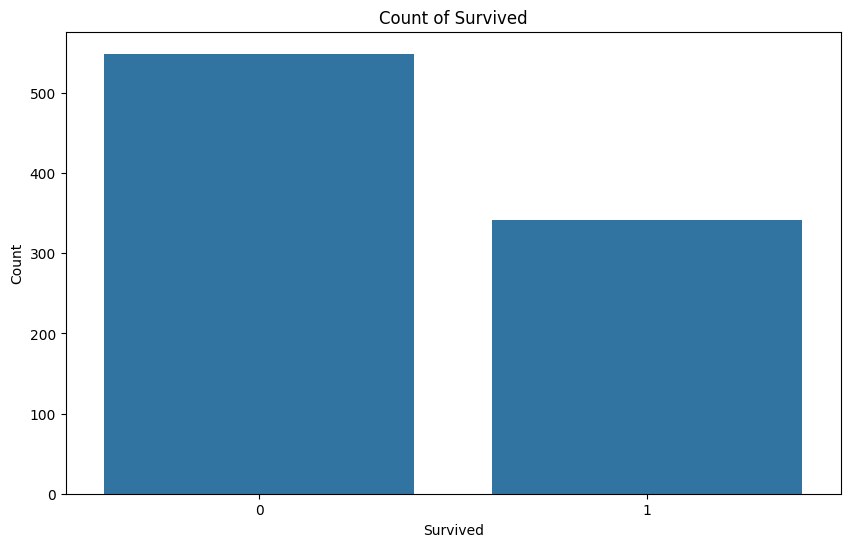

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic)
plt.title('Count of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


###Explore Relationships Between Features and Visualizing findings

#### Age Vs Survived

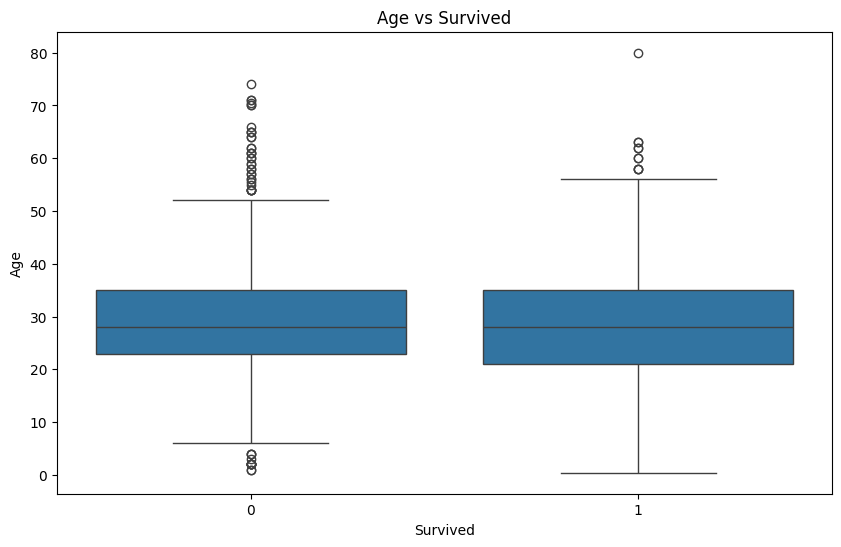

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age vs Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

#### Pclass vs Survived

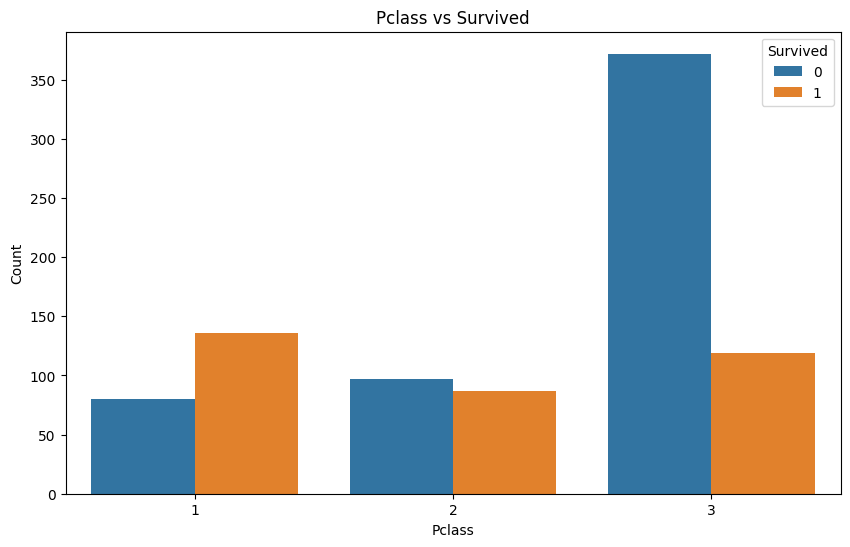

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Pclass vs Survived')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

#### Fare vs Survived

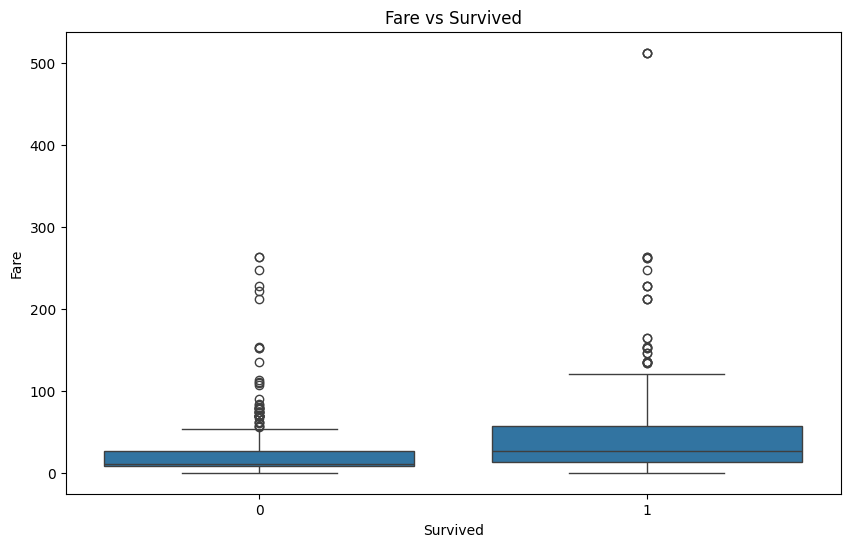

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.title('Fare vs Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

#### Heatmap Of Co-relations

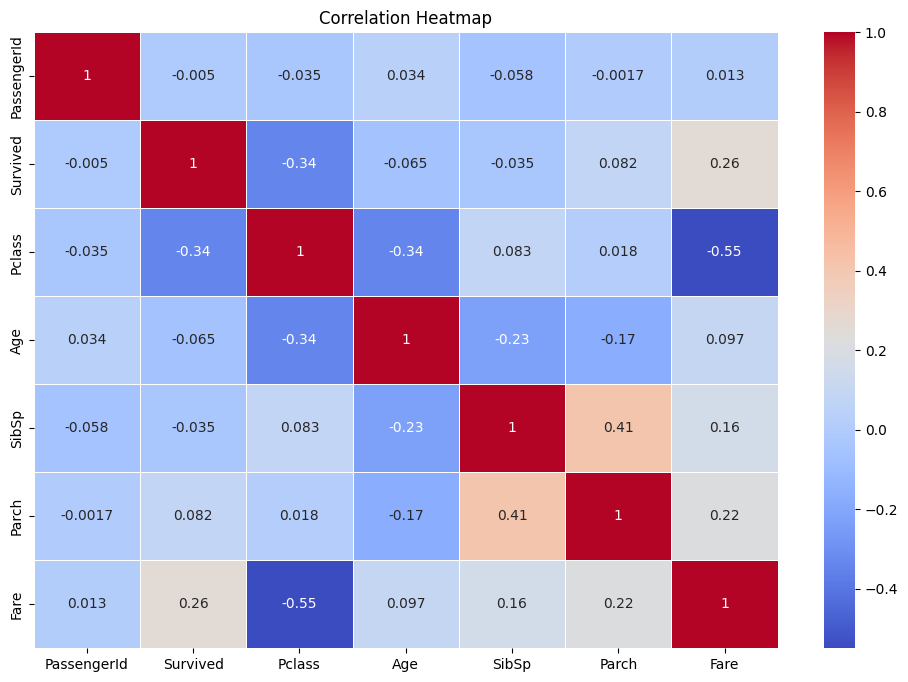

In [ ]:
# Exclude non-numeric columns for correlation matrix
numeric_titanic = titanic.select_dtypes(include=[np.number])

# Heatmap of correlations
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_titanic.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
